In [56]:
# dependenices

import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import  PowerTransformer

In [3]:
data = pd.read_csv(r'C:\Users\hp\Desktop\vscode\Cardio_Dataset.csv')

In [4]:
df = data.copy()
df.head()

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,age_years,bmi,bp_category,bp_category_encoded
0,0,18393,2,168,62.0,110,80,1,1,0,0,1,0,50,21.967120,Hypertension Stage 1,Hypertension Stage 1
1,1,20228,1,156,85.0,140,90,3,1,0,0,1,1,55,34.927679,Hypertension Stage 2,Hypertension Stage 2
2,2,18857,1,165,64.0,130,70,3,1,0,0,0,1,51,23.507805,Hypertension Stage 1,Hypertension Stage 1
3,3,17623,2,169,82.0,150,100,1,1,0,0,1,1,48,28.710479,Hypertension Stage 2,Hypertension Stage 2
4,4,17474,1,156,56.0,100,60,1,1,0,0,0,0,47,23.011177,Normal,Normal


In [5]:
df.shape

(68205, 17)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 68205 entries, 0 to 68204
Data columns (total 17 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   id                   68205 non-null  int64  
 1   age                  68205 non-null  int64  
 2   gender               68205 non-null  int64  
 3   height               68205 non-null  int64  
 4   weight               68205 non-null  float64
 5   ap_hi                68205 non-null  int64  
 6   ap_lo                68205 non-null  int64  
 7   cholesterol          68205 non-null  int64  
 8   gluc                 68205 non-null  int64  
 9   smoke                68205 non-null  int64  
 10  alco                 68205 non-null  int64  
 11  active               68205 non-null  int64  
 12  cardio               68205 non-null  int64  
 13  age_years            68205 non-null  int64  
 14  bmi                  68205 non-null  float64
 15  bp_category          68205 non-null 

In [7]:
df.columns

Index(['id', 'age', 'gender', 'height', 'weight', 'ap_hi', 'ap_lo',
       'cholesterol', 'gluc', 'smoke', 'alco', 'active', 'cardio', 'age_years',
       'bmi', 'bp_category', 'bp_category_encoded'],
      dtype='object')

In [8]:
## Data Preprocessing :

In [9]:
df.head()

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,age_years,bmi,bp_category,bp_category_encoded
0,0,18393,2,168,62.0,110,80,1,1,0,0,1,0,50,21.967120,Hypertension Stage 1,Hypertension Stage 1
1,1,20228,1,156,85.0,140,90,3,1,0,0,1,1,55,34.927679,Hypertension Stage 2,Hypertension Stage 2
2,2,18857,1,165,64.0,130,70,3,1,0,0,0,1,51,23.507805,Hypertension Stage 1,Hypertension Stage 1
3,3,17623,2,169,82.0,150,100,1,1,0,0,1,1,48,28.710479,Hypertension Stage 2,Hypertension Stage 2
4,4,17474,1,156,56.0,100,60,1,1,0,0,0,0,47,23.011177,Normal,Normal


In [10]:
cols_to_remove = ["id", "age", "bp_category_encoded"]

df.drop(cols_to_remove, axis = 1, inplace = True)
df.head()

,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,age_years,bmi,bp_category
0,2,168,62.0,110,80,1,1,0,0,1,0,50,21.967120,Hypertension Stage 1
1,1,156,85.0,140,90,3,1,0,0,1,1,55,34.927679,Hypertension Stage 2
2,1,165,64.0,130,70,3,1,0,0,0,1,51,23.507805,Hypertension Stage 1
3,2,169,82.0,150,100,1,1,0,0,1,1,48,28.710479,Hypertension Stage 2
4,1,156,56.0,100,60,1,1,0,0,0,0,47,23.011177,Normal


<Axes: xlabel='cardio', ylabel='count'>

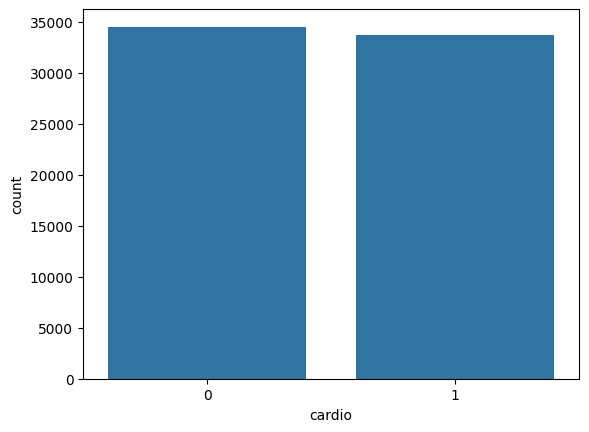

In [11]:
sns.countplot(data = df, x = 'cardio')

In [12]:
df['cardio'].value_counts()

cardio
0    34533
1    33672
Name: count, dtype: int64

In [13]:
df.isnull().sum()

gender         0
height         0
weight         0
ap_hi          0
ap_lo          0
cholesterol    0
gluc           0
smoke          0
alco           0
active         0
cardio         0
age_years      0
bmi            0
bp_category    0
dtype: int64

In [14]:
df.describe()

,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,age_years,bmi
count,68205.000000,68205.000000,68205.000000,68205.000000,68205.000000,68205.000000,68205.000000,68205.000000,68205.000000,68205.000000,68205.000000,68205.000000,68205.000000
mean,1.348625,164.372861,74.100688,126.434924,81.263925,1.363243,1.225174,0.087662,0.053134,0.803548,0.493688,52.823635,27.510513
std,0.476539,8.176756,14.288862,15.961685,9.143985,0.678080,0.571288,0.282805,0.224302,0.397317,0.499964,6.769909,6.026497
min,1.000000,55.000000,11.000000,90.000000,60.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,29.000000,3.471784
25%,1.000000,159.000000,65.000000,120.000000,80.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000,48.000000,23.875115
50%,1.000000,165.000000,72.000000,120.000000,80.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000,53.000000,26.346494
75%,2.000000,170.000000,82.000000,140.000000,90.000000,1.000000,1.000000,0.000000,0.000000,1.000000,1.000000,58.000000,30.116213
max,2.000000,250.000000,200.000000,180.000000,120.000000,3.000000,3.000000,1.000000,1.000000,1.000000,1.000000,64.000000,298.666667


In [15]:
df.head()

,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,age_years,bmi,bp_category
0,2,168,62.0,110,80,1,1,0,0,1,0,50,21.967120,Hypertension Stage 1
1,1,156,85.0,140,90,3,1,0,0,1,1,55,34.927679,Hypertension Stage 2
2,1,165,64.0,130,70,3,1,0,0,0,1,51,23.507805,Hypertension Stage 1
3,2,169,82.0,150,100,1,1,0,0,1,1,48,28.710479,Hypertension Stage 2
4,1,156,56.0,100,60,1,1,0,0,0,0,47,23.011177,Normal


In [16]:
# Numerical = []
# Categorical = []

# for col in df.columns:
#     if df[col].dtypes != 'O':
#         Numerical.append(col)
#     else:
#         Categorical.append(col)

In [17]:
# Numerical

In [18]:
# Categorical

In [19]:
Categorical =  ["gender", "cholesterol", "gluc",
                 "smoke", "alco", "active", "bp_category"]

In [20]:
Numerical = [col for col in df.columns if col not in Categorical]
Numerical


['height', 'weight', 'ap_hi', 'ap_lo', 'cardio', 'age_years', 'bmi']

In [21]:
# df.info()

In [22]:
df[Numerical
   ]

,height,weight,ap_hi,ap_lo,cardio,age_years,bmi
0,168,62.0,110,80,0,50,21.967120
1,156,85.0,140,90,1,55,34.927679
2,165,64.0,130,70,1,51,23.507805
3,169,82.0,150,100,1,48,28.710479
4,156,56.0,100,60,0,47,23.011177
...,...,...,...,...,...,...,...
68200,168,76.0,120,80,0,52,26.927438
68201,158,126.0,140,90,1,61,50.472681
68202,183,105.0,180,90,1,52,31.353579
68203,163,72.0,135,80,1,61,27.099251


In [23]:
corr = df[Numerical].corr()

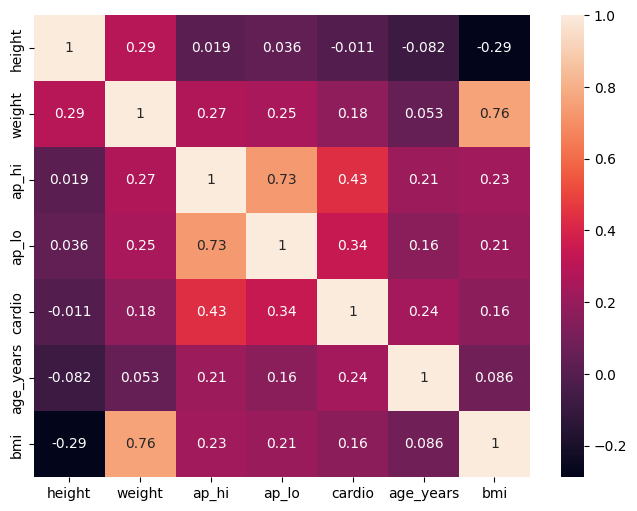

In [24]:
plt.figure(figsize=(8,6))
sns.heatmap(corr,annot= True)

plt.savefig('Heatmap.png')

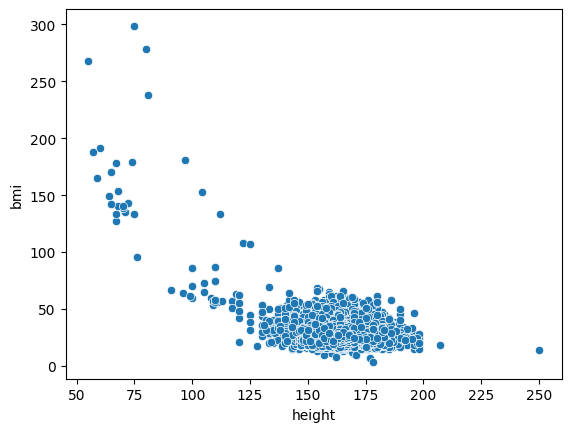

In [25]:
sns.scatterplot(df, x = 'height', y = 'bmi')
plt.savefig('weight vs heigh.png')

<Axes: xlabel='height', ylabel='weight'>

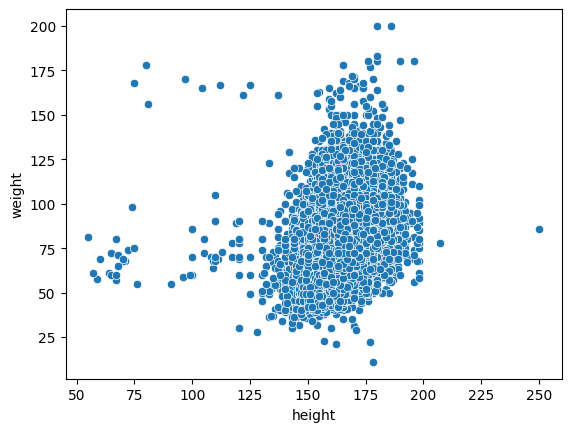

In [26]:
sns.scatterplot(df , x = 'height', y = 'weight')

In [27]:
df.head()

,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,age_years,bmi,bp_category
0,2,168,62.0,110,80,1,1,0,0,1,0,50,21.967120,Hypertension Stage 1
1,1,156,85.0,140,90,3,1,0,0,1,1,55,34.927679,Hypertension Stage 2
2,1,165,64.0,130,70,3,1,0,0,0,1,51,23.507805,Hypertension Stage 1
3,2,169,82.0,150,100,1,1,0,0,1,1,48,28.710479,Hypertension Stage 2
4,1,156,56.0,100,60,1,1,0,0,0,0,47,23.011177,Normal


<Axes: xlabel='height', ylabel='Density'>

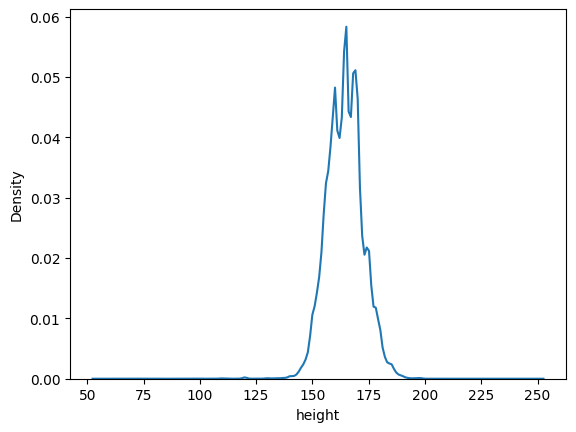

In [28]:
sns.kdeplot(df['height'])

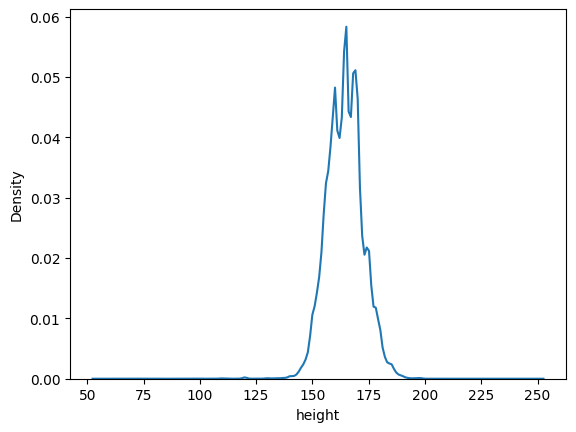

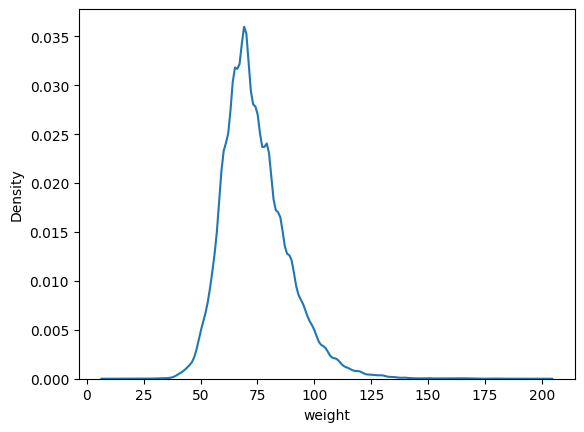

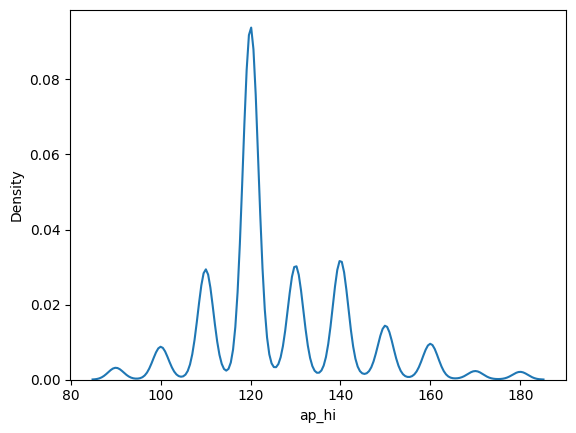

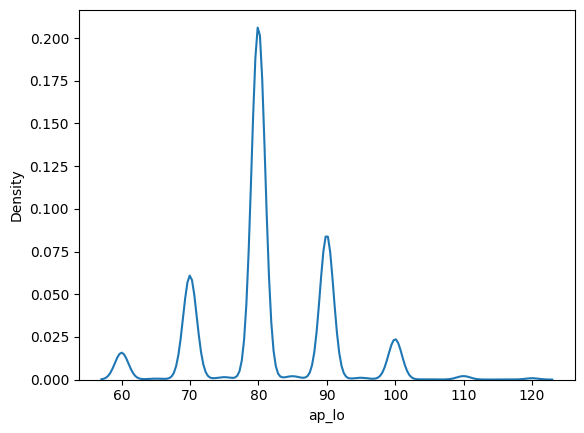

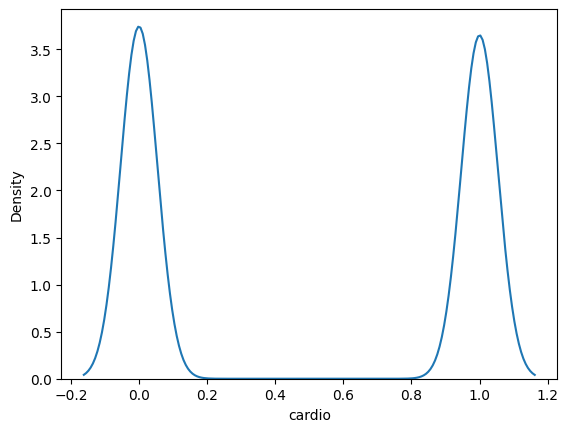

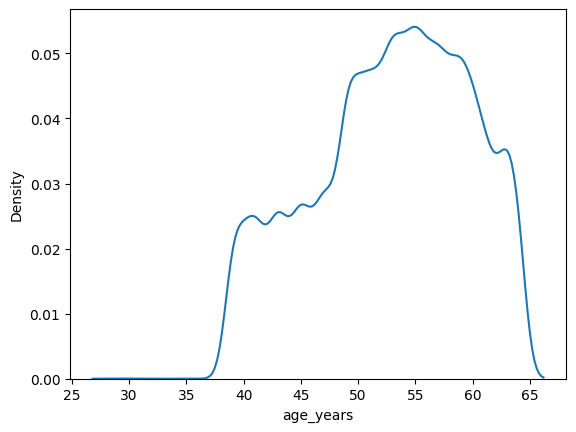

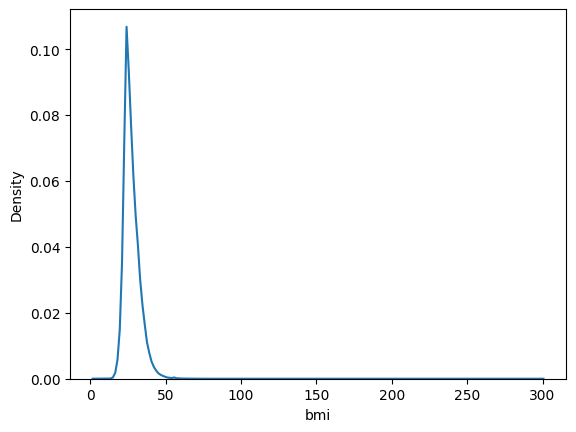

In [29]:
for col in Numerical:
    plt.figure()
    sns.kdeplot(df[col])

<Axes: ylabel='height'>

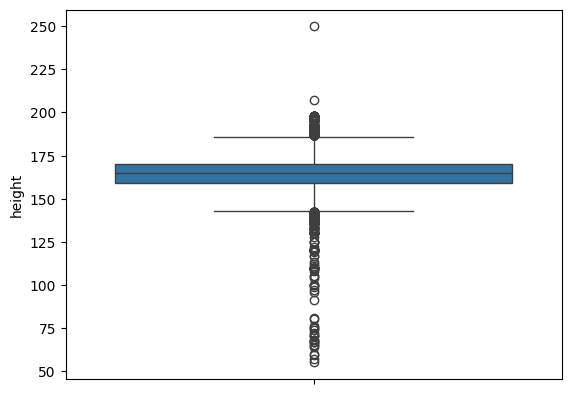

In [30]:
sns.boxplot(df['height'])

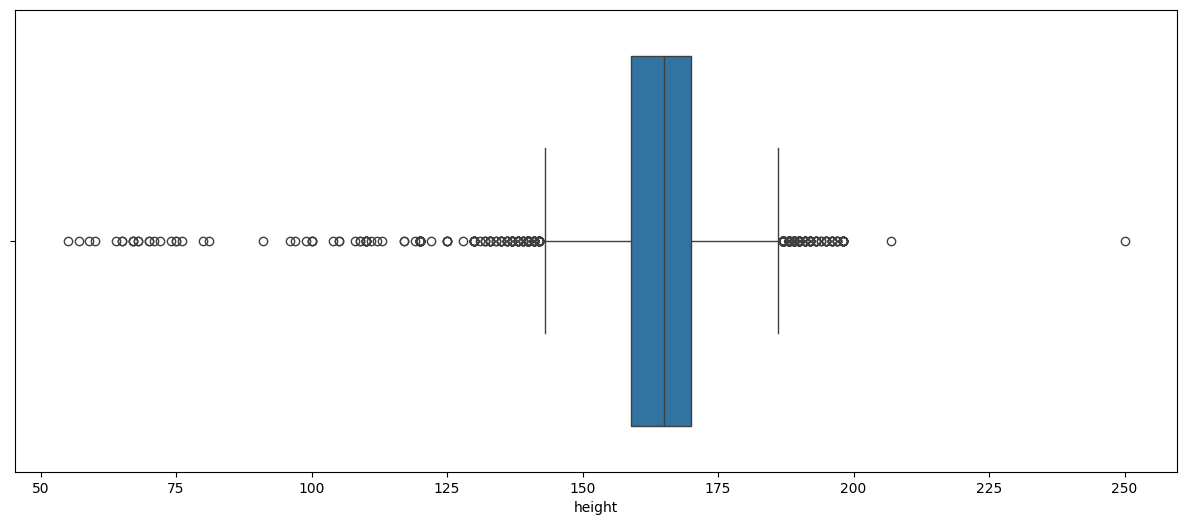

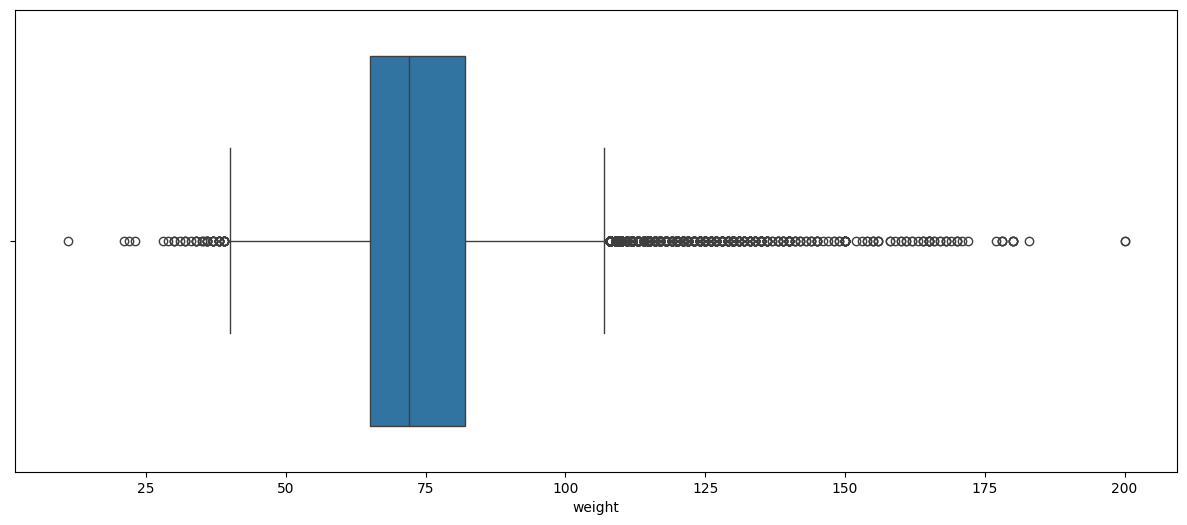

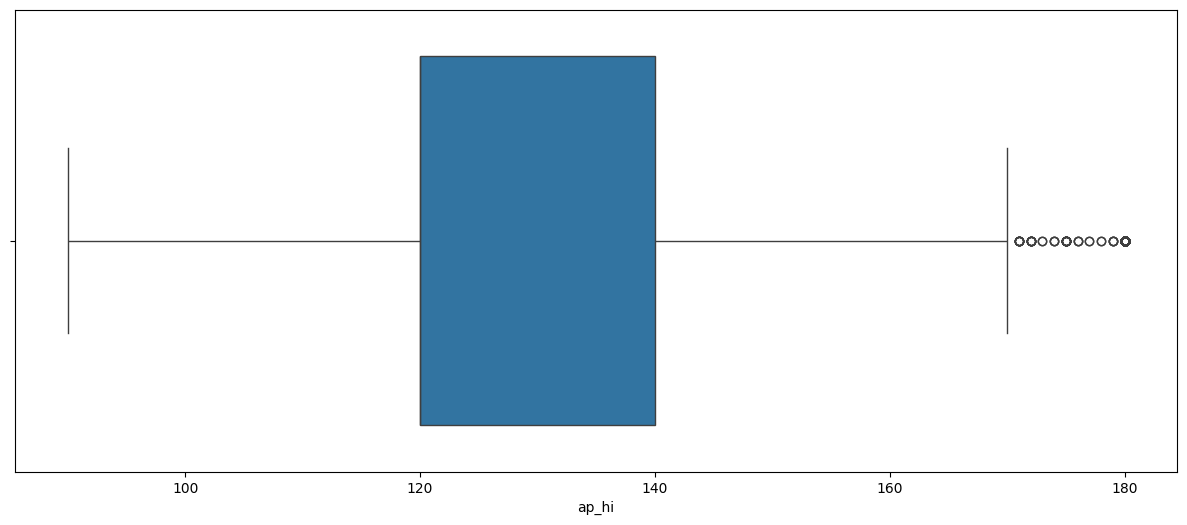

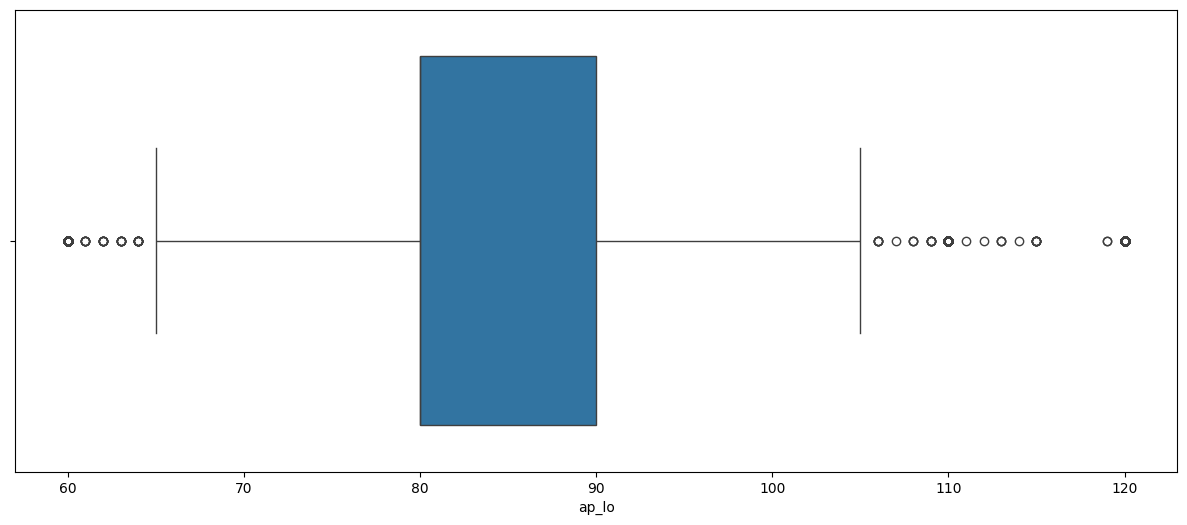

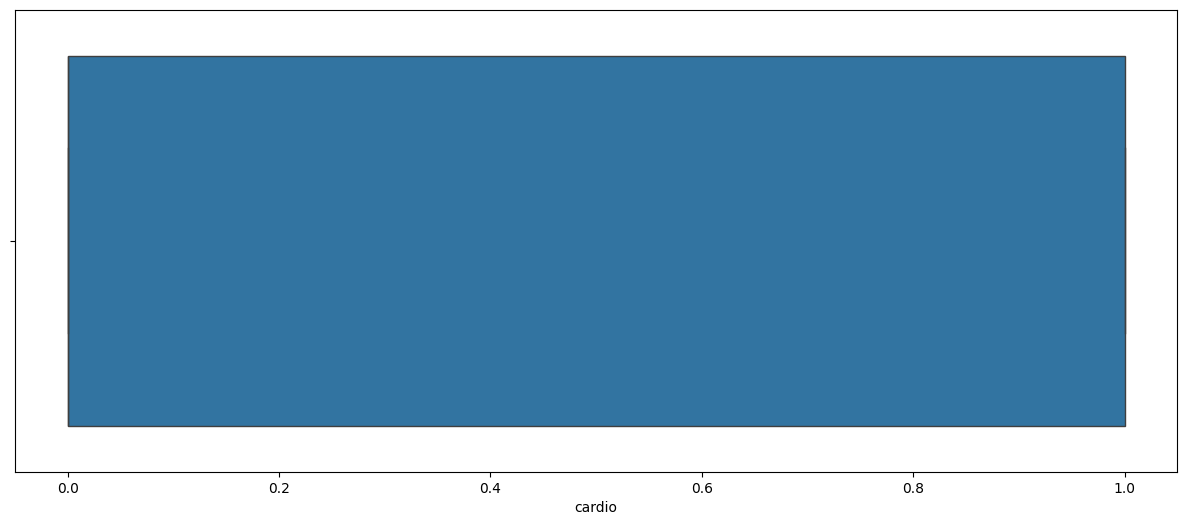

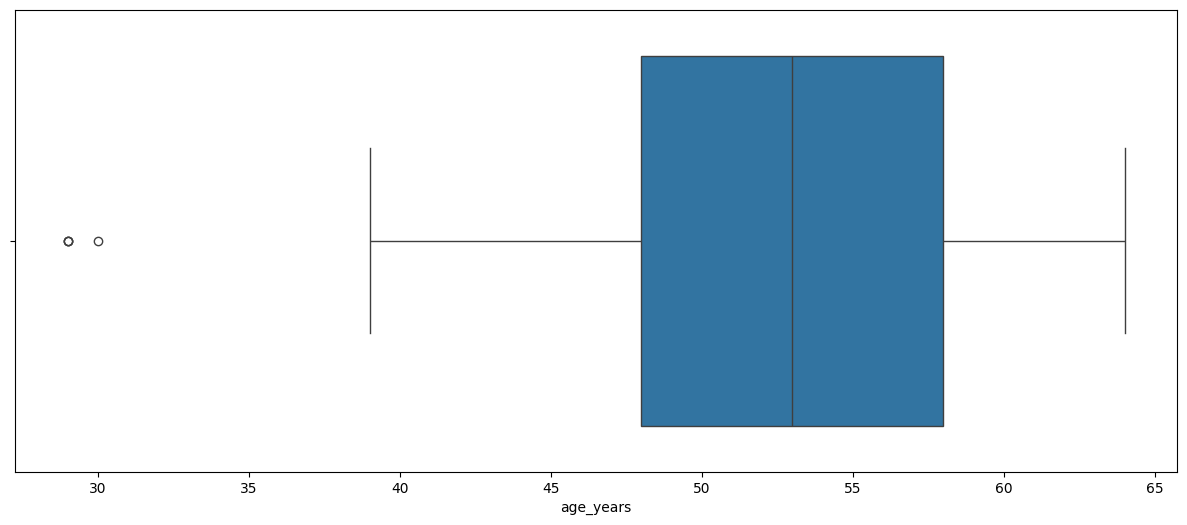

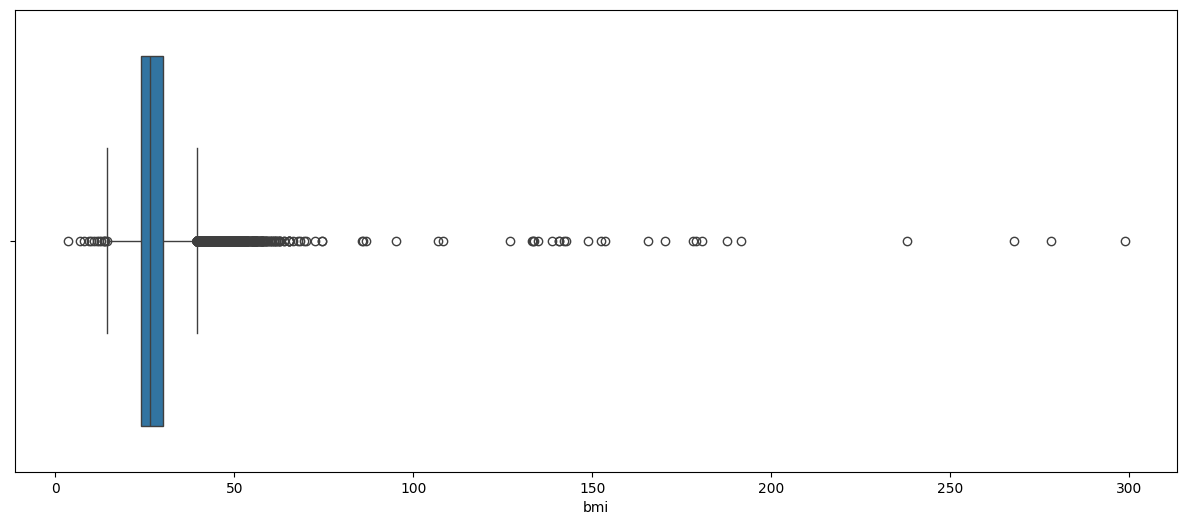

In [31]:
for col in Numerical:
    plt.figure(figsize= (15,6))
    sns.boxplot(df[col], orient= 'h')

In [32]:
df.head()

,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,age_years,bmi,bp_category
0,2,168,62.0,110,80,1,1,0,0,1,0,50,21.967120,Hypertension Stage 1
1,1,156,85.0,140,90,3,1,0,0,1,1,55,34.927679,Hypertension Stage 2
2,1,165,64.0,130,70,3,1,0,0,0,1,51,23.507805,Hypertension Stage 1
3,2,169,82.0,150,100,1,1,0,0,1,1,48,28.710479,Hypertension Stage 2
4,1,156,56.0,100,60,1,1,0,0,0,0,47,23.011177,Normal


In [33]:
df.head()

,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,age_years,bmi,bp_category
0,2,168,62.0,110,80,1,1,0,0,1,0,50,21.967120,Hypertension Stage 1
1,1,156,85.0,140,90,3,1,0,0,1,1,55,34.927679,Hypertension Stage 2
2,1,165,64.0,130,70,3,1,0,0,0,1,51,23.507805,Hypertension Stage 1
3,2,169,82.0,150,100,1,1,0,0,1,1,48,28.710479,Hypertension Stage 2
4,1,156,56.0,100,60,1,1,0,0,0,0,47,23.011177,Normal


In [34]:
df.shape

(68205, 14)

In [ ]:
# Iqr , Boundary values , Percentile, yeojohnson : Box - cons

<Axes: ylabel='height'>

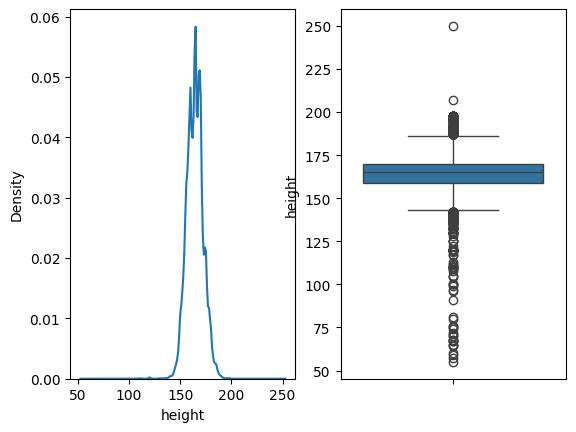

In [51]:
fig , ax = plt.subplots(1,2)

# plt.figure(figsize = (10,5))

sns.kdeplot(df['height'], ax = ax[0])
sns.boxplot(df['height'], ax = ax[1])

In [ ]:
# log
df['height_log'] = np.log1p(df['height'])

In [54]:
df['height_sqr'] = np.sqrt(df['height'])

<Axes: ylabel='height_sqr'>

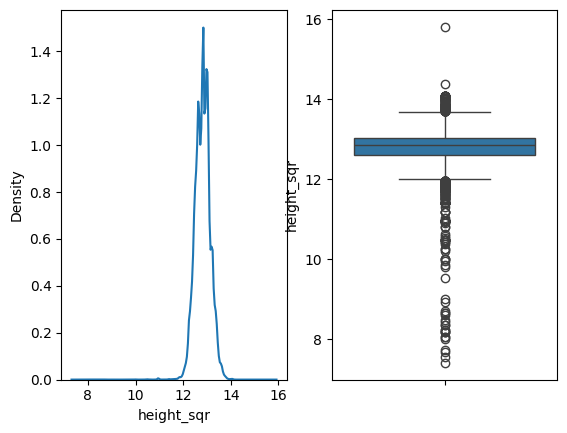

In [55]:
fig , ax = plt.subplots(1,2)

# plt.figure(figsize = (10,5))

sns.kdeplot(df['height_sqr'], ax = ax[0])
sns.boxplot(df['height_sqr'], ax = ax[1])

<Axes: ylabel='height_yj'>

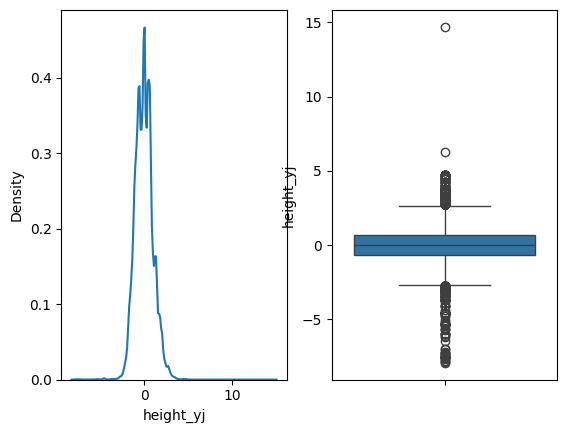

In [59]:
pt = PowerTransformer()

df['height_yj'] = pt.fit_transform(df[['height']])

fig , ax = plt.subplots(1,2)

# plt.figure(figsize = (10,5))

sns.kdeplot(df['height_yj'], ax = ax[0])
sns.boxplot(df['height_yj'], ax = ax[1])